## fashion MNIST database

In [36]:
#import os
#print(os.listdir("."))

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [64]:
data = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')
data.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
X = data.drop(columns=["label"]).values[:1000,:]
testX = test.drop(columns=["label"]).values
X.shape, X.dtype, type(X),X.ndim

((1000, 784), dtype('int64'), numpy.ndarray, 2)

In [66]:
y = data["label"].values[:1000].reshape(-1,1)
test_y = test["label"].values.reshape(-1,1)
y.shape, y.dtype, type(y),y.ndim,len(y)

((1000, 1), dtype('int64'), numpy.ndarray, 2, 1000)

In [40]:
#Labels
num_labels = 10

#Each training and test example is assigned to one of the following labels:
#0 T-shirt/top
#1 Trouser
#2 Pullover
#3 Dress
#4 Coat
#5 Sandal
#6 Shirt
#7 Sneaker
#8 Bag
#9 Ankle boot 

In [41]:
from mlspace import *

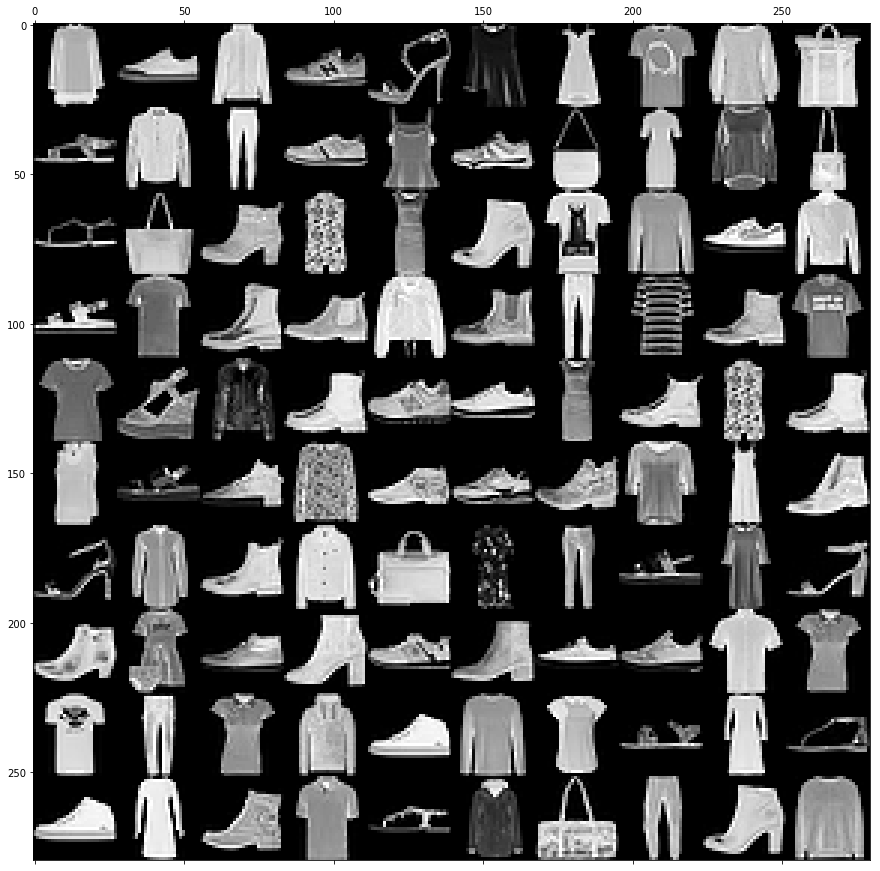

In [42]:
displayData(X)

In [58]:
X0 = (X-X.mean(axis=0))/(X.max(axis=0)-X.min(axis=0))
l = 0.1
all_theta = oneVsAll(X0, y, num_labels, l)

class 0
         Current function value: 0.016647
         Iterations: 100
         Function evaluations: 101
         Gradient evaluations: 101
class 1
         Current function value: 0.004074
         Iterations: 100
         Function evaluations: 101
         Gradient evaluations: 101
class 2
         Current function value: 0.038626
         Iterations: 100
         Function evaluations: 101
         Gradient evaluations: 101
class 3
         Current function value: 0.024073
         Iterations: 100
         Function evaluations: 101
         Gradient evaluations: 101
class 4
         Current function value: 0.024776
         Iterations: 100
         Function evaluations: 102
         Gradient evaluations: 102
class 5
         Current function value: 0.009233
         Iterations: 100
         Function evaluations: 102
         Gradient evaluations: 102
class 6
         Current function value: 0.048149
         Iterations: 100
         Function evaluations: 101
         Gradient ev

In [69]:
#np.savetxt("all_theta.txt",all_theta)
#all_theta.shape, all_theta.dtype, type(all_theta),all_theta.ndim,all_theta.T.shape
all_theta = np.loadtxt("all_theta.txt")

In [70]:
p = predictOneVsAll(all_theta, X0)
print('The training set accuracy is about {}%'.format(np.around(np.sum(p == y)/len(y)*100,decimals=1)))

The training set accuracy is about 100.0%


In [71]:
testX0 = (testX-testX.mean(axis=0))/(testX.max(axis=0)-testX.min(axis=0))
pt = predictOneVsAll(all_theta, testX0)
print('The testing set accuracy is about {}%'.format(np.around(np.sum(pt == test_y)/len(test_y)*100,decimals=1)))

The testing set accuracy is about 79.1%


## The MNIST database of handwritten digits

In [12]:
import scipy.io as sio
#sio.savemat

sio.whosmat("ex3data1.mat")

mat = sio.loadmat("ex3data1.mat")
mat_X=mat["X"]
mat_y=mat["y"]
mat_y[mat_y == 10] = 0

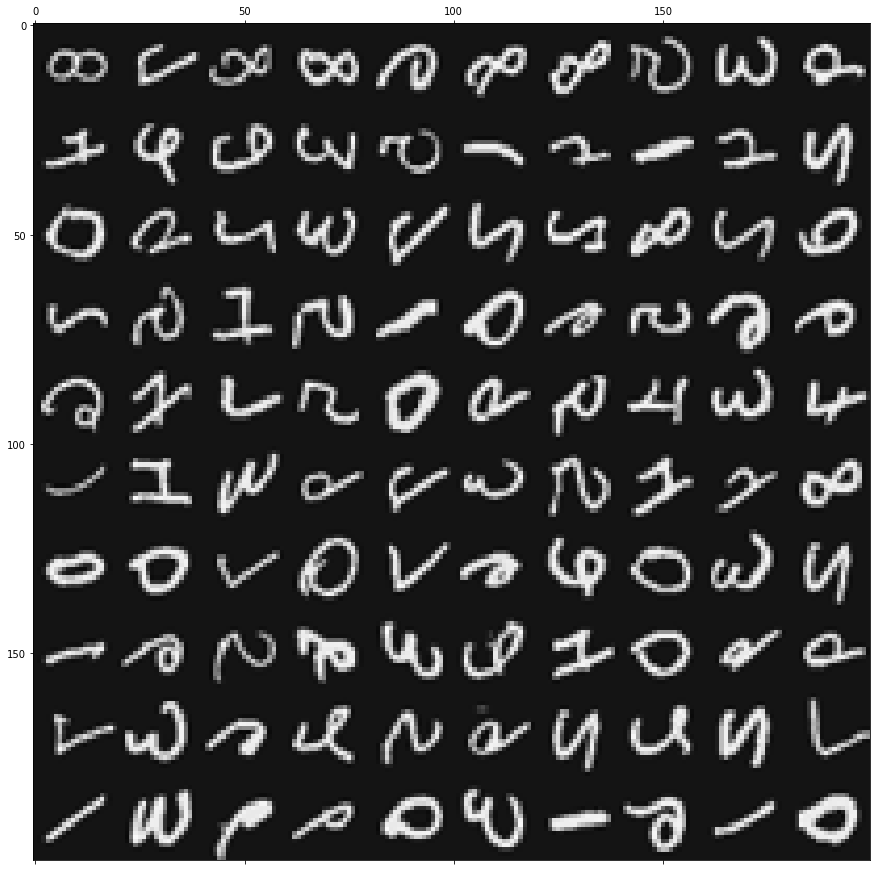

In [63]:
displayData(mat_X)

In [14]:
# while training uncomment this lines ...
#l = 0.1
#all_theta2 = oneVsAll(mat_X, mat_y, num_labels, l)

class 0
         Current function value: 0.011152
         Iterations: 100
         Function evaluations: 101
         Gradient evaluations: 101
class 1
         Current function value: 0.015886
         Iterations: 100
         Function evaluations: 101
         Gradient evaluations: 101
class 2
         Current function value: 0.057711
         Iterations: 100
         Function evaluations: 101
         Gradient evaluations: 101
class 3
         Current function value: 0.063871
         Iterations: 100
         Function evaluations: 101
         Gradient evaluations: 101
class 4
         Current function value: 0.039198
         Iterations: 100
         Function evaluations: 101
         Gradient evaluations: 101
class 5
         Current function value: 0.062642
         Iterations: 100
         Function evaluations: 101
         Gradient evaluations: 101
class 6
         Current function value: 0.023617
         Iterations: 100
         Function evaluations: 101
         Gradient ev

In [34]:
all_theta2[0,0]
# while training uncomment this line ...
#np.savetxt("all_theta2.txt",all_theta2)
all_theta2 = np.loadtxt("all_theta2.txt")

In [35]:
p2 = predictOneVsAll(all_theta2, mat_X)
print('The training set accuracy is about {}%'.format(np.around(np.sum(p2 == mat_y)/len(mat_y)*100,decimals=1)))

The training set accuracy is about 94.9%
